In [1]:
from IPython.display import display, Image, HTML

# Display text with styles
display(HTML("""
<center style="font-size: xx-large;">Université Abdelhamid Ibn Badis - Mostaganem
<br>Faculté des Sciences Exactes et de l'Informatique
<br>Département de Mathématiques et Informatique
<br>Master ISI
<br>Fouille de Données
</center>
<br>
<!-- Display image -->
<center>
  <img src="https://drive.google.com/uc?export=view&id=15uzPyvfgv3obSupxZAFHY21YA82yFs0M" width='160' height='160'>
</center>
 <br>
<center><b>
  <div style="text-align: center; font-size: xx-large;">
    présenté par : </div>
   <div style=" font-size: x-large;">

    <br>Ali Maradj<br>
    Wissal Manseri<br>
    Bouchra Benidris<br>
    Ahmed Belmiloud<br>
    Abderrahmane Benkoula<br>
     </div>
    <br>
     <div style="text-align: center; font-size: x-large;">
    Sous la direction de :  M. Zahmani </div>


</b></center>
<br>

"""))


In [ ]:
from IPython.display import HTML, display

html_content = """
 <div style="border-radius: 10px; border: #000018 solid; padding: 15px; background-color: #000000; font-size: 100%; text-align: left;color: white;">
  <h3 align="left"><font color='#c99c17';font-size: xx-large;>
📚  Titanic_ML_competition : </font></h3>
 </div>
"""

# Utiliser la fonction display pour afficher le code HTML correctement
display(HTML(html_content))




#  Importation de bibliothèques :

In [ ]:
# manipulation des données
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Visualisation des données
import seaborn as sns
import matplotlib.pyplot as plt

# Modèles d’apprentissage automatique
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn import linear_model
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier



# Évaluation du modèle
from sklearn.model_selection import cross_val_score

# Réglage des hyperparamètres
from sklearn.model_selection import GridSearchCV

# Réglage des hyperparamètres
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from IPython.display import HTML, display

html_content = """
 <div style="border-radius: 10px; border: #000018 solid; padding: 15px; background-color: #000000; font-size: 100%; text-align: left;color: white;">
  <h1 font color='white';font-size: xx-large;>collecte de données</h3>
  <h3 align="left"><font color='#c99c17';font-size: x-large;>
Les données pour cette étude ont été obtenues à partir du concours Titanic - Machine Learning from Disaster fourni par le site Web de Kaggle.
Il contient un ensemble de données sur les trains et un ensemble de données de test. L’ensemble de données sur les trains compte 891 enregistrements et 12 caractéristiques.
 L’ensemble de données de test compte 418 enregistrements et 11 caractéristiques. La variable a expliquer de cette étude (variable dépendante) est de savoir si les passagers ont survécu à la tragédie du Titanic.
  </font></h3>
 </div>
"""

# Utiliser la fonction display pour afficher le code HTML correctement
display(HTML(html_content))


# 2. Importer et lire des données
Importer et lire les 3 jeux de données

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
ss = pd.read_csv("gender_submission.csv")

Let's have a look at the datasets.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print("Training set shape: ", train.shape)
print("Test set shape: ", test.shape)

Training set shape:  (891, 12)
Test set shape:  (418, 11)


In [ ]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
ss.shape

(418, 2)

3. Description des données :

In [ ]:
from IPython.display import HTML, display

html_content = """
<div style="border-radius: 10px; border: #000018 solid; padding: 15px; background-color: #000000; font-size: 100%; text-align: left;color: white;">
  <h3 align="left"><font color='white';font-size: xx-large;>
  Description des données : </font></h3>

    <ol style="color: #c99c17;">
    <li>Survived: <br> 0 = Did not survive,<br>  1 = Survived</li>
    <li>Pclass: Ticket class where <br>  1 = First class,<br> 2 = Second class,<br>  3 = Third class.</li>
    <li> Sex: Male or female</li>
    <li>Age: Age in years</li>
    <li>SibSp: Number of siblings or spouses aboard the titanic</li>
    <li>Parch: Number of parents or children aboard the titanic</li>
    <li>Ticket: Passenger ticket number</li>
    <li>Fare: Passenger fare</li>
    <li>Cabin: Cabin number</li>
    <li>Embarked: Point of embarkation where <br>  C = Cherbourg,<br>  Q = Queenstown,<br>  S = Southampton</li>
    </ol>
 </div>
"""
display(HTML(html_content))


# 4. L’analyse exploratoire des données  (EDA)



L’analyse exploratoire des données est le processus de visualisation et d’analyse des données pour extraire des informations. En d’autres termes, nous voulons résumer les caractéristiques et les tendances importantes de nos données afin de mieux comprendre notre jeu de données.

## 4.1 Types de données, données manquantes et statistiques récapitulatives

In [ ]:
#Nbre de numéros non nuls et types de données de la formation(of the training)

train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Le jeu de données se présente sous la forme d'un DataFrame pandas avec un total de 891 entrées réparties sur 12 colonnes. Les colonnes comprennent divers types de données, notamment des entiers (int64), des flottants (float64), et des objets (object).

- certaines colonnes présentent des valeurs manquantes, notamment les colonnes "Age", "Cabin", et "Embarked" car elles représentent un total inférieur au nombre d'entrées dans le jeu de données(891).


In [ ]:
# Nombre non nul et types de données de l’ensemble de tests
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Le jeu de données associé à ce DataFrame se compose d'un total de 418 entrées réparties sur 11 colonnes. Ces colonnes comprennent des types de données variés tels que des entiers (int64), des flottants (float64), et des objets (object).

- Certaines colonnes présentent des valeurs manquantes, notamment les colonnes "Age", "Fare", "Cabin", en raison d'un total inférieur au nombre d'entrées dans le jeu de données (418).

In [ ]:
# Données manquantes dans la formation (train)définies par colonnes

train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Cela donne une vue détaillée du nombre de valeurs manquantes pour chaque colonne de notre jeu de données, Plus précisément, les colonnes 'Cabin' comptent 687 valeurs manquantes, 'Age' présente 177 valeurs manquantes, et 'Embarked' est concernée par 2 valeurs manquantes. En revanche, les autres colonnes telles que 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', et 'Fare' ne comportent aucune valeur manquante."

In [ ]:
# Données manquantes dans le test défini par colonnes

test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

En ce qui concerne le jeu de données de test, certaines colonnes affichent également des valeurs manquantes. Pour être plus précis, la colonne 'Cabin' compte 327 valeurs manquantes, 'Age' en compte 86, et 'Fare' est associée à 1 valeur manquante. Toutefois, les colonnes telles que 'PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', et 'Embarked' ne présentent aucune valeur manquante.

Il semble que les colonnes **Âge**, **Cabine** et **Embarqué** dans le jeu de formation ont des données manquantes tandis que** Âge**, **Tarif** et **Cabine**dans le jeu de test ont des données manquantes

In [ ]:
# Statistiques récapitulatives pour l’ensemble de formation

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Ces statistiques fournissent une vue d'ensemble des caractéristiques clés du jeu de données d'entraînement.

* Le nombre total de passagers (PassengerId) est de 891.
* Le taux de survie moyen (Survived) est d'environ 38.38%.
* La classe moyenne du billet (Pclass) est d'environ 2.31, avec une distribution allant de 1 à 3.
* L'âge moyen des passagers (Age) est d'environ 29.70 ans, avec une déviation standard de 14.53 ans.
* Le nombre moyen de frères, sœurs ou époux/épouses à bord (SibSp) est d'environ 0.52.
* Le nombre moyen de parents ou enfants à bord (Parch) est d'environ 0.38.
* Le tarif moyen payé par les passagers (Fare) est d'environ 32.20, avec une variation importante allant de 0 à 512.33."

In [ ]:
# Statistiques récapitulatives pour l’ensemble de test

test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


es statistiques fournissent une vue d'ensemble des caractéristiques clés du jeu de données de test.

* Le nombre total de passagers (PassengerId) est de 418.
* La classe moyenne du billet (Pclass) est d'environ 2.27, avec une distribution allant de 1 à 3.
* L'âge moyen des passagers (Age) est d'environ 30.27 ans, avec une déviation standard de 14.18 ans.
* Le nombre moyen de frères, sœurs ou époux/épouses à bord (SibSp) est d'environ 0.45.
* Le nombre moyen de parents ou enfants à bord (Parch) est d'environ 0.39.
* Le tarif moyen payé par les passagers (Fare) est d'environ 35.63, avec une déviation standard importante allant de 0 à 512.33.


## 4.2 Analyse des caractéristiques

In [ ]:
from IPython.display import HTML, display

html_content = """
 <div style="border-radius: 10px; border: #000018 solid; padding: 15px; background-color: #000000; font-size: 100%; text-align: left;color: white;">
  <h1 font color='white';font-size: xx-large;>Analyse des caractéristiques</h3>
  <h3 align="left"><font color='#c99c17';font-size: x-large;>
   Un dataframe est composé de lignes et de colonnes. Le nombre de lignes correspond au nombre d’observations dans notre jeu de données alors que les colonnes, parfois appelées caractéristiques, représentent des caractéristiques qui aident à décrire ces observations. Dans notre jeu de données, les lignes sont les passagers sur le Titanic tandis que les colonnes sont les caractéristiques qui décrivent les passagers comme leur âge, leur sexe, etc.

<p> Il est également crucial de souligner la distinction entre une variable catégorique et une variable numérique.</p> </font> </h3>
  <ol>
  <li>Les variables catégorielles, comme leur nom l’indique, présentent des valeurs qui appartiennent à l'une des deux catégories ou plus, et il n’y a généralement pas d’ordre intrinsèque entre ces catégories.

Un exemple illustratif dans nos données est la caractéristique du sexe, où chaque passager est clairement classifié comme masculin ou féminin.</li>
  <li>les variables numériques se caractérisent par une distribution continue. Des exemples concrets de variables numériques dans notre jeu de données incluent les caractéristiques d’âge et de tarif. RMQ/ avoir si une caractéristique est une variable numérique ou une variable catégorielle nous aide à structurer notre analyse plus correctement. Par exemple, il n’est pas logique de calculer la moyenne d’une variable catégorique telle que le genre simplement parce que le genre est une classification binaire</li>

  </ol>
  <p><font color='#c99c17';font-size: x-large;>les variables numériques se caractérisent par une distribution continue. Des exemples concrets de variables numériques dans notre jeu de données incluent les caractéristiques d’âge et de tarif. RMQ/ avoir si une caractéristique est une variable numérique ou une variable catégorielle nous aide à structurer notre analyse plus correctement. Par exemple, il n’est pas logique de calculer la moyenne d’une variable catégorique telle que le genre simplement parce que le genre est une classification binaire</p>
 </font></div>
"""

# Utiliser la fonction display pour afficher le code HTML correctement
display(HTML(html_content))


## 4.2.1 variables catégorielles

Les variables catégoriques de notre jeu de données sont Sexe, Pclass et Embarqué.



##  Variable catégorique : Sexe




In [ ]:
# Nombre de valeurs de la colonne du sexe

train['Sex'].value_counts(dropna = False)



male      577
female    314
Name: Sex, dtype: int64

La variable 'Sex' se compose de deux catégories : 'male' avec 577 occurrences et 'female' avec 314 occurrences, enregistrées dans le format int64

- Il y a plus de passagers masculins que de passagers féminins sur Titanic

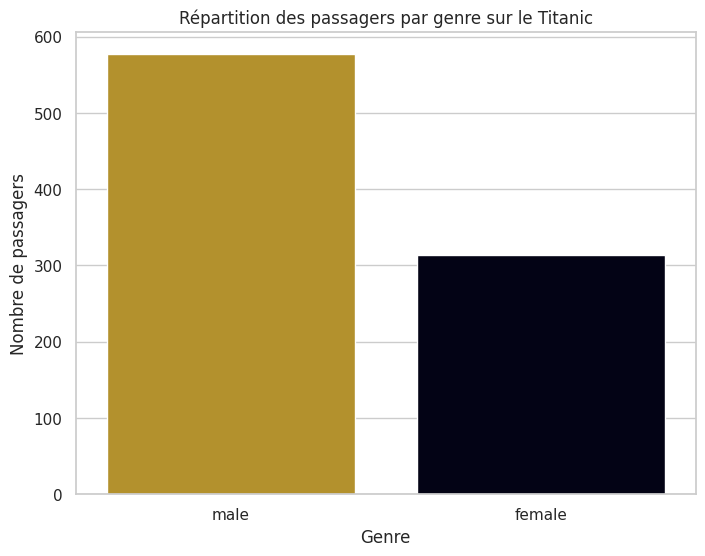

In [ ]:

# Définir les couleurs
colors = ['#c99c17', '#000018']

# Value counts of the 'Sex' column
sex_counts = train['Sex'].value_counts(dropna=False)

# Plotting with Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Bar plot
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette=colors)

# Titre et étiquettes
plt.title('Répartition des passagers par genre sur le Titanic')
plt.xlabel('Genre')
plt.ylabel('Nombre de passagers')

# Affichage du plot
plt.show()



In [ ]:
# Moyen de survie par sexe

train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


- Le tableau indique le taux de survie pour chaque genre, avec un taux de survie de 74.20% pour les femmes (female) et de 18.89% pour les hommes (male).

- Les données mettent en évidence une disparité significative dans le taux de survie entre les sexes. Les femmes affichent un remarquable taux de survie  tandis que celui des hommes est nettement inférieur.

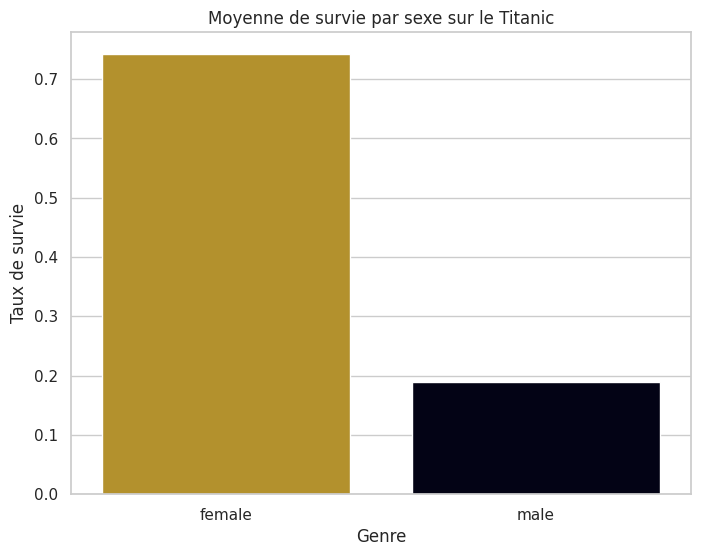

In [ ]:


# Définir les couleurs
colors = ['#c99c17', '#000018']

# Créer le DataFrame
survival_by_sex = train[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

# Arrondir les valeurs de 'Survived' à deux chiffres après la virgule
survival_by_sex['Survived'] = survival_by_sex['Survived']

# Plotting with Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Bar plot avec les valeurs exactes sur l'axe x
sns.barplot(x=survival_by_sex['Sex'], y='Survived', data=survival_by_sex, palette=colors)

# Titre et étiquettes
plt.title('Moyenne de survie par sexe sur le Titanic')
plt.xlabel('Genre')
plt.ylabel('Taux de survie')

# Affichage du plot
plt.show()



## Variable catégorique : Pclass

In [ ]:
# # Nombre de valeurs de la colonne Pclass

train['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

- La répartition des passagers par classe est notable, avec une concentration élevée de 491 personnes dans la Classe 3, suivie de 216 personnes dans la Classe 1 et 184 personnes dans la Classe 2

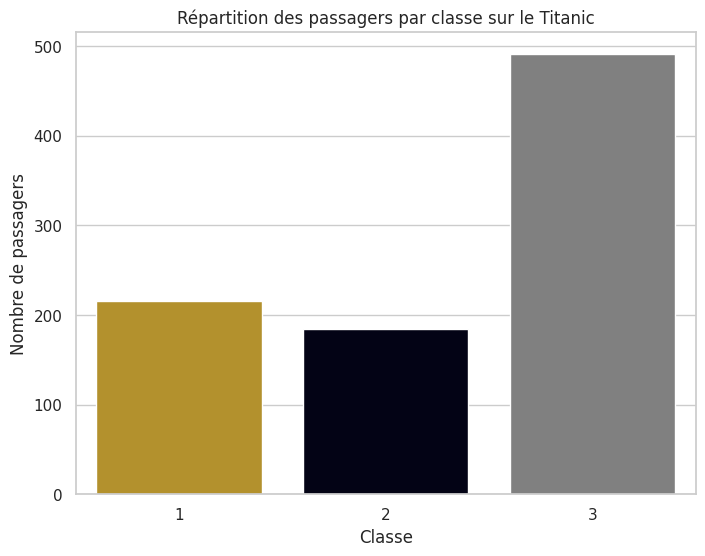

In [ ]:


# Définir les couleurs
colors = ['#c99c17', '#000018', '#808080']

# Value counts de la colonne 'Pclass'
pclass_counts = train['Pclass'].value_counts(dropna=False)

# Plotting with Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Bar plot avec les couleurs spécifiées
sns.barplot(x=pclass_counts.index, y=pclass_counts.values, palette=colors)

# Titre et étiquettes
plt.title('Répartition des passagers par classe sur le Titanic')
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers')

# Affichage du plot
plt.show()


In [ ]:
# Groupement par classe (Pclass) et survivance, puis comptage
survival_counts_by_class = train.groupby(['Pclass', 'Survived']).size().reset_index(name='Count')

# Affichage du DataFrame avec les statistiques
print(survival_counts_by_class)



   Pclass  Survived  Count
0       1         0     80
1       1         1    136
2       2         0     97
3       2         1     87
4       3         0    372
5       3         1    119


Dans l'analyse comparative des taux de survie par classe (Pclass), des tendances significatives émergent. Les résultats indiquent que la Classe 1 a un taux de survie plus élevé, avec 136 survivants parmi les 216 passagers, tandis que la Classe 2 affiche une répartition relativement équilibrée, avec 87 survivants sur 184 passagers. En revanche, la Classe 3 présente un taux de survie inférieur, avec 119 survivants parmi les 491 passagers. Ces données suggèrent une corrélation entre la classe du billet et la probabilité de survie, avec des avantages plus marqués pour les passagers de la Classe 1 par rapport aux autres classes.
la Classe 3 se distingue par un nombre élevé de décès.

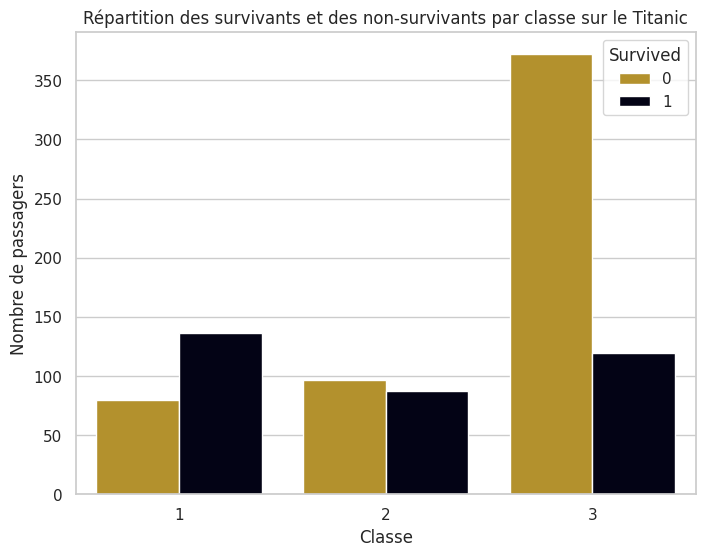

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir les couleurs
colors = ['#c99c17', '#000018', '#f57c00']

# Plotting with Seaborn countplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Countplot avec distinction par classe (Pclass), hue = "Survived" pour la distinction survécu/non survécu
sns.countplot(x="Pclass", hue="Survived", data=train, palette=colors)

# Titre et étiquettes
plt.title('Répartition des survivants et des non-survivants par classe sur le Titanic')
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers')

# Affichage du plot
plt.show()



In [ ]:
# Mean of survival by passenger class

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Les taux de survie varient notablement selon la classe du billet (Pclass). En détaillant ces différences, on observe que la Classe 1 affiche un taux de survie significativement plus élevé, atteignant 62.96%. La Classe 2 présente un taux intermédiaire, avec 47.28% de survivants, tandis que le taux de survie le plus bas est enregistré dans la Classe 3, avec seulement 24.24% de passagers ayant survécu. Ces données soulignent une corrélation négative entre la classe du billet et la probabilité de survie, les passagers des classes supérieures ayant des taux de survie plus élevés par rapport à ceux des classes inférieures.

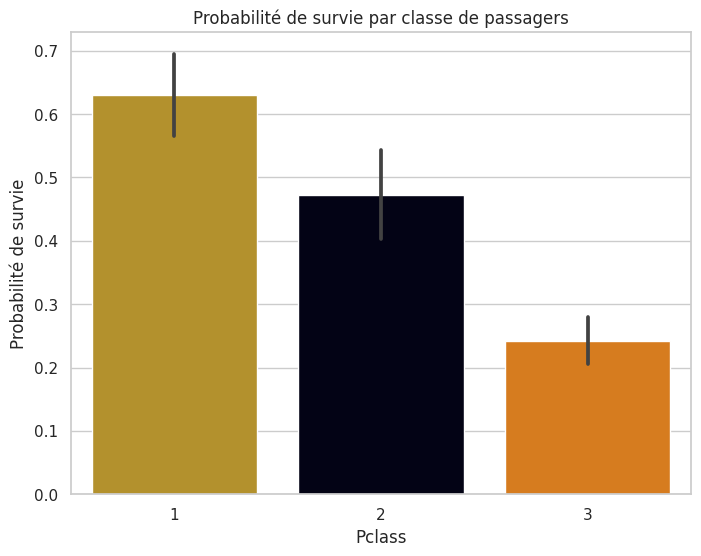

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir les couleurs
colors = ['#c99c17', '#000018', '#f57c00']

# Plotting with Seaborn barplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Barplot avec les couleurs spécifiées
sns.barplot(x='Pclass', y='Survived', data=train, palette=colors)

# Titre et étiquettes
plt.ylabel('Probabilité de survie')
plt.title('Probabilité de survie par classe de passagers')

# Affichage du plot
plt.show()


# Comment: Survival probability decrease with passenger class, first class passengers are prioritised during evacuation

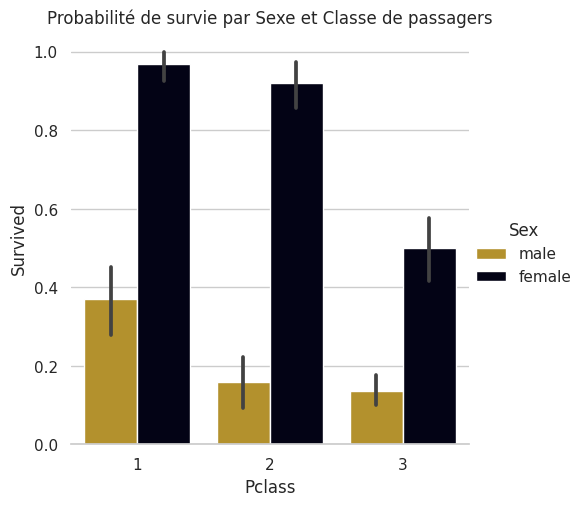

In [ ]:
#Survie par sexe et classe de passagers
# Définir les couleurs
colors = ['#c99c17', '#000018']

# Plotting with Seaborn catplot
sns.set(style="whitegrid")
g = sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train, kind='bar', palette=colors)
g.despine(left=True)

# Titre et étiquettes
plt.title('Probabilité de survie par Sexe et Classe de passagers')
plt.show()


## Categorical variable: Embarked

In [ ]:
# Comptage des valeurs des colonnes embarquées

train['Embarked'].value_counts(dropna = False)


S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

Les données relatives au lieu d'embarquement (Embarked) révèlent que la majorité des passagers ont embarqué à Southampton (S), avec un total de 644. Cherbourg (C) est également représenté, accueillant 168 passagers, suivi de Queenstown (Q) avec 77 passagers. De plus, deux entrées présentent des valeurs manquantes (NaN)

In [ ]:
# Mean of survival by point of embarkation

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Les taux de survie varient en fonction du lieu d'embarquement (Embarked). Les passagers embarqués à Cherbourg (C) affichent le taux de survie le plus élevé, atteignant 55.36%. Queenstown (Q) suit avec un taux de survie de 38.96%, tandis que Southampton (S) enregistre le taux de survie le plus bas, avec seulement 33.70% de passagers ayant survécu. Ces variations suggèrent une association entre le lieu d'embarquement et la probabilité de survie, les passagers embarqués à Cherbourg présentant un avantage notable en termes de survie.

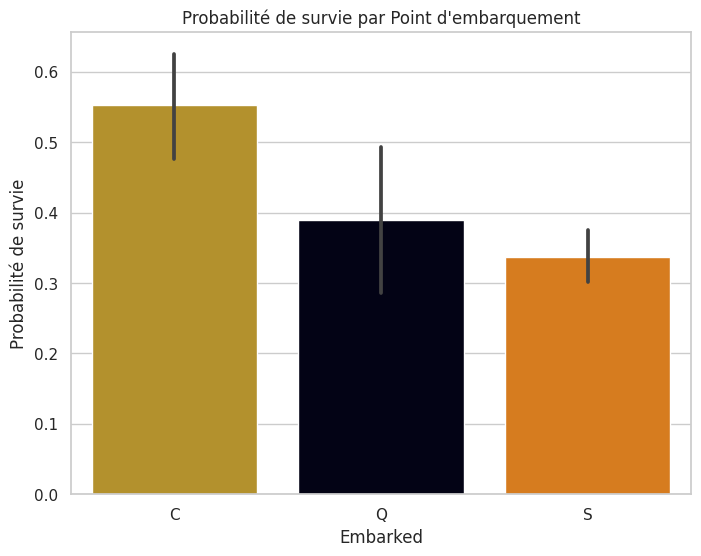

In [ ]:
# Définir les couleurs
colors = ['#c99c17', '#000018', '#f57c00']

# Plotting with Seaborn barplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Barplot avec les couleurs spécifiées et l'ordre des catégories 'Embarked'
sns.barplot(x='Embarked', y='Survived', data=train, palette=colors, order=['C', 'Q', 'S'])

# Titre et étiquettes
plt.ylabel('Probabilité de survie')
plt.title('Probabilité de survie par Point d\'embarquement')

# Affichage du plot
plt.show()


- La probabilité de survie est la plus élevée pour l’emplacement C et la plus faible pour l’emplacement S.

- Nous pouvons formuler une hypothèse selon laquelle la majorité des passagers de première classe ont embarqué à partir de l’emplacement C et parce qu’ils ont une probabilité de survie la plus élevée, cela a eu pour résultat que l’emplacement C a une probabilité de survie la plus élevée. Par ailleurs, il aurait pu y avoir plus de passagers de troisième classe qui se sont embarqués de l’emplacement S et parce qu’ils ont la plus faible probabilité de survie, cela a fait en sorte que l’emplacement S a la plus faible probabilité de survie.

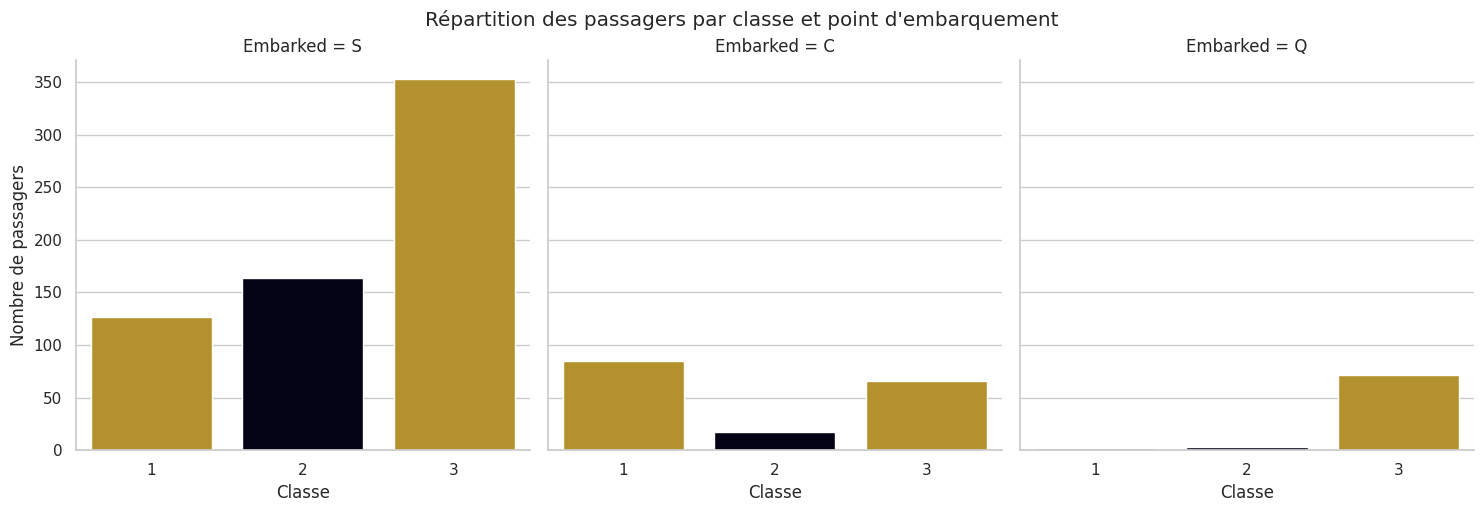

In [ ]:
# Définir les couleurs
colors = ['#c99c17', '#000018', '#c99c17','#555555', '#000018']

# Plotting with Seaborn catplot
sns.set(style="whitegrid")
g = sns.catplot(x='Pclass', col='Embarked', data=train, kind='count', palette=colors)

# Titre et étiquettes
g.fig.suptitle('Répartition des passagers par classe et point d\'embarquement', y=1.02)
g.set_axis_labels('Classe', 'Nombre de passagers')

# Affichage du plot
plt.show()

Notre hypothèse semble être vraie. L’emplacement S a le plus de troisième classe

les passagers, tandis que l’emplacement C compte le plus grand nombre de passagers de première classe.

In [ ]:
# Survival probability by all categorical variables

import pandas as pd
import seaborn as sns

# Créer un DataFrame avec les colonnes nécessaires
df_plot = train[['Embarked', 'Pclass', 'Survived', 'Sex']]

# Calculer les pourcentages de survie par groupe
survival_percentage = df_plot.groupby(['Embarked', 'Pclass', 'Sex'])['Survived'].mean() * 100
survival_percentage = survival_percentage.reset_index()

# Afficher le DataFrame avec les pourcentages de survie
print(survival_percentage)


   Embarked  Pclass     Sex    Survived
0         C       1  female   97.674419
1         C       1    male   40.476190
2         C       2  female  100.000000
3         C       2    male   20.000000
4         C       3  female   65.217391
5         C       3    male   23.255814
6         Q       1  female  100.000000
7         Q       1    male    0.000000
8         Q       2  female  100.000000
9         Q       2    male    0.000000
10        Q       3  female   72.727273
11        Q       3    male    7.692308
12        S       1  female   95.833333
13        S       1    male   35.443038
14        S       2  female   91.044776
15        S       2    male   15.463918
16        S       3  female   37.500000
17        S       3    male   12.830189


In [ ]:
from IPython.display import HTML, display

html_content = """
<div style="border-radius: 10px; border: #000018 solid; padding: 15px; background-color: #000000; font-size: 100%; text-align: left;color: white;">
  <h1 font color='white';font-size: xx-large;>Le tableau permet de voir comment le taux de survie varie en fonction du point d'embarquement, de la classe et du sexe des passagers</h1>

  <h3 align="left"><font color='#c99c17';font-size: x-large;>
    <ul>
      <li ><strong>Point d'embarquement ('Embarked') :</strong> Les passagers embarqués à C semblent avoir des taux de survie plus élevés, en particulier pour la classe 2 et les femmes. Les passagers embarqués à Q ont des variations significatives, mais en général, les femmes ont un taux de survie plus élevé.</li>

      <li><strong>Classe du passager ('Pclass') :</strong> En général, la classe 1 a des taux de survie plus élevés que les classes 2 et 3. La classe 2 a des taux de survie relativement élevés, en particulier pour les passagers embarqués à C et les femmes. La classe 3 a les taux de survie les plus bas, en particulier pour les hommes.</li>

      <li><strong>Genre ('Sex') :</strong> Les femmes ont généralement des taux de survie plus élevés que les hommes dans toutes les catégories. Cela est particulièrement évident pour la classe 1 et les passagers embarqués à C.</li>
    </ul>
  </font></h3>

  <h3 align="left"><font color='#c99c17';font-size: x-large;>
    <strong>** Interactions :</strong> Certaines interactions entre les variables peuvent être observées. Par exemple, les femmes de la classe 1 ont généralement des taux de survie élevés, mais cela semble être encore plus prononcé pour celles embarquées à C.
    En résumé, les tendances générales montrent que les femmes, en particulier celles de la classe 1 et embarquées à C, ont les taux de survie les plus élevés. Les passagers de la classe 3 et les hommes ont généralement des taux de survie plus bas.
  </font></h3>
</div>
"""

# Utiliser la fonction display pour afficher le code HTML correctement
display(HTML(html_content))


## 4.2.2 Variables numériques

Les variables numériques dans notre jeu de données sont SibSp, Parch, Age et Fare.

##  Détecter et supprimer les valeurs aberrantes dans les variables numériques

Les valeurs aberrantes sont des points de données qui ont des valeurs extrêmes et qui ne sont pas conformes à la majorité des données. Il est important de régler ce problème, car les valeurs aberrantes ont tendance à biaiser nos données vers les extrêmes et peuvent entraîner des prédictions de modèles inexactes.

In [ ]:
def detect_outliers(df, n, features):
    """"
    Cette fonction parcourt une liste de fonctionnalités et détecte les valeurs aberrantes dans chacune de ces fonctionnalités. Dans chaque
    boucle, un point de données est considéré comme une valeur aberrante s’il est inférieur au premier quartile moins l’étape aberrante ou dépasse
    troisième quartile plus la valeur aberrante. La valeur aberrante est définie comme étant 1,5 fois la plage interquartile. Une fois le
    les valeurs aberrantes ont été déterminées pour une caractéristique, leurs indices seront stockés dans une liste avant de passer à la suivante
    et le processus se répète jusqu’à ce que la toute dernière fonction soit terminée. Enfin, en utilisant la liste
    Pour les indices, nous compterons les fréquences des indices et les retournerons si leur fréquence dépasse n fois.
    """
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [ ]:
# Valeurs aberrantes dans les variables numériques

train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


- Les données présentées mettent en évidence des valeurs potentiellement aberrantes dans le jeu de données d'entraînement. Ces valeurs atypiques concernent plusieurs passagers, notamment ceux avec les ID 28, 89, 160, 181, 202, 325, 342, 793, 847, et 864. Ces passagers se caractérisent par des particularités dans différentes variables telles que l'âge (Age), le nombre de frères, sœurs ou époux/épouses à bord (SibSp), le nombre de parents ou enfants à bord (Parch), le tarif payé (Fare), ainsi que la classe du billet (Pclass). L'identification et la gestion appropriée de ces valeurs aberrantes seront essentielles pour assurer l'intégrité de l'analyse statistique.

In [ ]:
#Supprimer les valeurs aberrantes et réinitialiser l’index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


Lorsque les valeurs aberrantes ont été supprimées du jeu de données d'entraînement, le nombre de lignes est passé de 891 à 881. Cela indique qu'après avoir éliminé les valeurs atypiques, 10 lignes ont été retirées du DataFrame, conduisant à une nouvelle taille de 881 lignes. Cette opération peut contribuer à améliorer la robustesse de l'analyse en excluant les observations qui pourraient introduire des biais ou des distorsions dans les résultats.







## Corrélation des variables numériques avec la survie

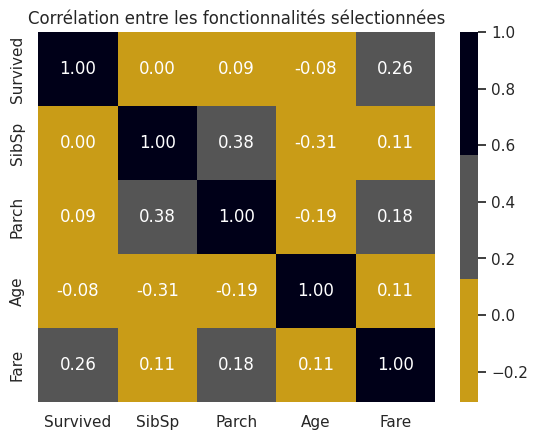

In [ ]:
# Définir la palette de couleurs
colors = [ '#c99c17','#555555', '#000018']

# Heatmap avec des couleurs personnalisées
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot=True, fmt='.2f', cmap=sns.color_palette(colors))

# Titre du plot
plt.title('Corrélation entre les fonctionnalités sélectionnées')

# Affichage du plot
plt.show()


# Comment: Fare seems to be the only feature that has a substantial correlation with survival

## Variable numérique : SibSp

In [ ]:
# Nombre de valeurs de la colonne SibSp

train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

Cela donne une vue détaillée de la répartition du nombre de frères, sœurs ou époux/épouses à bord parmi les passagers.

- L'affichage indique la distribution des valeurs dans la colonne 'SibSp' du DataFrame, où chaque valeur correspond au nombre de frères, sœurs, ou époux/épouses à bord pour un passager donné. Voici la signification de cet affichage :

* 608 passagers n'ont aucun frère, sœur, ou époux/épouse à bord (SibSp = 0).
* 209 passagers ont un frère, sœur, ou époux/épouse à bord (SibSp = 1).
* 28 passagers ont deux frères, sœurs, ou époux/épouses à bord (SibSp = 2).
* 18 passagers ont trois frères, sœurs, ou époux/épouses à bord (SibSp = 3).
* 13 passagers ont quatre frères, sœurs, ou époux/épouses à bord (SibSp = 4).
* 5 passagers ont cinq frères, sœurs, ou époux/épouses à bord (SibSp = 5).





In [ ]:
# Moyenne de survie par SibSp

train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


ce code indiquent la moyenne de survie pour chaque valeur unique de la colonne 'SibSp' (nombre de frères, sœurs, ou époux/épouses à bord). Voici la signification de cet affichage :

* Pour les passagers avec 1 frère, sœur, ou époux/épouse à bord (SibSp = 1), la moyenne de survie est d'environ 53.59%.
* Pour ceux ayant 2 frères, sœurs, ou époux/épouses à bord (SibSp = 2), la moyenne de survie est d'environ 46.43%.
* Les passagers sans frères, sœurs, ou époux/épouse à bord (SibSp = 0) ont une moyenne de survie d'environ 34.54%.
* Pour ceux avec 4 frères, sœurs, ou époux/épouses à bord (SibSp = 4), la moyenne de survie est d'environ 16.67%.
* Les passagers avec 3 frères, sœurs, ou époux/épouses à bord (SibSp = 3) présentent une moyenne de survie d'environ 15.38%.
* Pour les passagers avec 5 frères, sœurs, ou époux/épouses à bord (SibSp = 5), la moyenne de survie est de 0%.

- Ces résultats suggèrent une corrélation entre le nombre de frères, sœurs ou époux/épouses à bord et la probabilité de survie, montrant des variations significatives dans les taux de survie en fonction de cette variable.

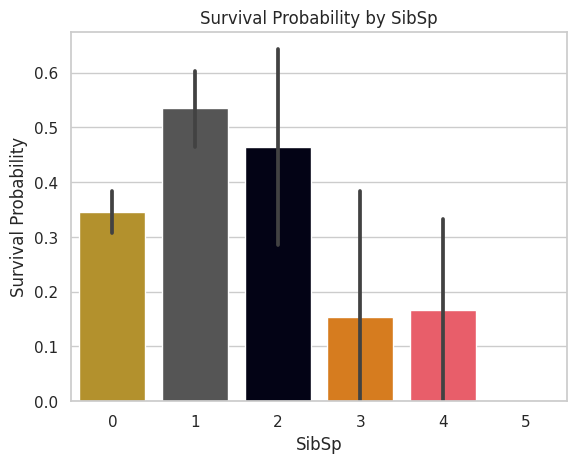

In [ ]:
# Définir la palette de couleurs
colors = ['#c99c17', '#555555', '#000018', '#f57c00' , '#ff4757']

# Barplot avec les couleurs modifiées
sns.barplot(x='SibSp', y='Survived', data=train, palette=colors)

# Titre du plot
plt.title('Survival Probability by SibSp')
plt.ylabel('Survival Probability')

# Affichage du plot
plt.show()


## Numerical variable: Parch

In [ ]:
# Comptage des valeurs de la colonne Parch

train['Parch'].value_counts(dropna = False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Ces résultats fournissent une vue détaillée de la distribution du nombre de parents ou enfants à bord parmi les passagers

* 678 passagers n'ont aucun parent ou enfant à bord (Parch = 0).
* 118 passagers ont un parent ou enfant à bord (Parch = 1).
* 70 passagers ont deux parents ou enfants à bord (Parch = 2).
* 5 passagers ont cinq parents ou enfants à bord (Parch = 5).
* 5 passagers ont trois parents ou enfants à bord (Parch = 3).
* 4 passagers ont quatre parents ou enfants à bord (Parch = 4).
* 1 passager a six parents ou enfants à bord (Parch = 6).

In [ ]:
# Moyen de survie par Parch

train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Voici la moyenne de survie pour chaque valeur unique de la colonne 'Parch' (nombre de parents ou enfants à bord). Voici la signification de cet affichage :

* Pour les passagers avec 3 parents ou enfants à bord (Parch = 3), la moyenne de survie est d'environ 60.00%.
* Ceux ayant 1 parent ou enfant à bord (Parch = 1) présentent une moyenne de survie d'environ 55.08%.
* Les passagers avec 2 parents ou enfants à bord (Parch = 2) ont une moyenne de survie d'environ 54.29%.
* Les passagers sans parent ni enfant à bord (Parch = 0) ont une moyenne de survie d'environ 34.37%.
* Pour ceux avec 5 parents ou enfants à bord (Parch = 5), la moyenne de survie est d'environ 20.00%.
* Les passagers ayant 4 parents ou enfants à bord (Parch = 4) ont un taux de survie de 0%.
* Les passagers avec 6 parents ou enfants à bord (Parch = 6) présentent également un taux de survie de 0%.

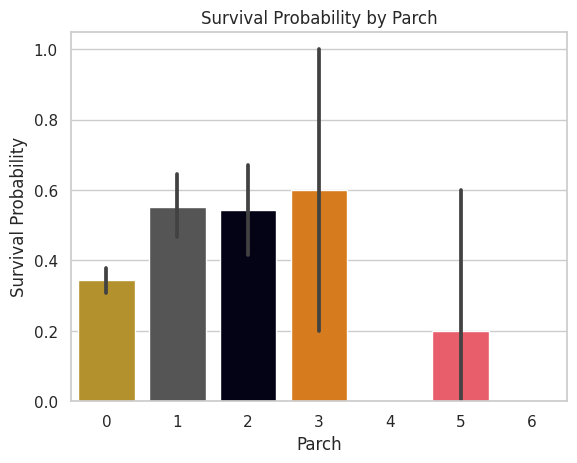

In [ ]:
# Définir la palette de couleurs
colors = ['#c99c17', '#555555', '#000018', '#f57c00','#f57c00', '#ff4757']

# Barplot avec les couleurs modifiées
sns.barplot(x='Parch', y='Survived', data=train, palette=colors)

# Titre du plot
plt.title('Survival Probability by Parch')
plt.ylabel('Survival Probability')

# Affichage du plot
plt.show()


## Numerical variable: Age

In [ ]:
#Valeurs nulles dans la colonne Age

train['Age'].isnull().sum()

170

Le nombre de valeurs nulles dans la colonne 'Age' du DataFrame. En l'occurrence, il y a 170 valeurs nulles dans la colonne 'Age'. Cela indique qu'il y a 170 entrées où l'âge des passagers n'est pas renseigné dans le jeu de données

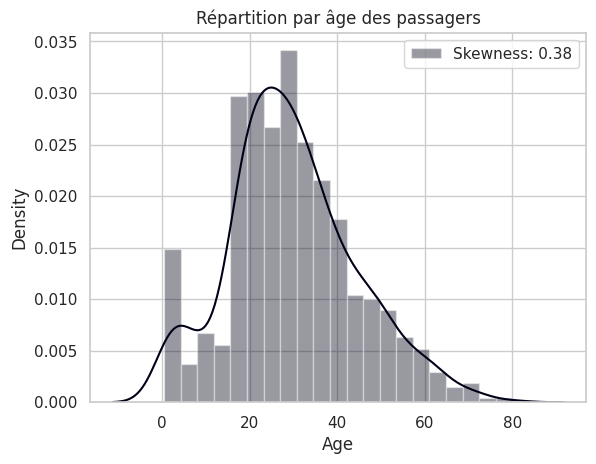

In [ ]:
# Répartition par âge des passagers

# Définir la couleur
couleur = '#000018'

# Distplot avec la couleur spécifiée
sns.distplot(train['Age'], label='Skewness: %.2f' % (train['Age'].skew()), color=couleur)

# Légende
plt.legend(loc='best')

# Titre du plot
plt.title('Répartition par âge des passagers')

# Affichage du plot
plt.show()


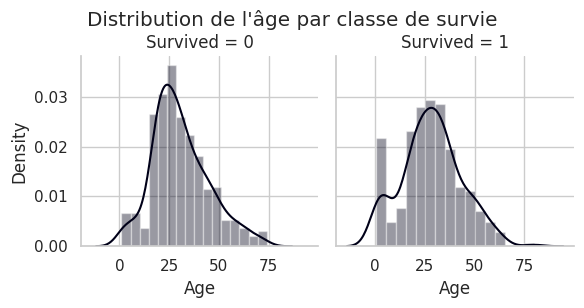

In [ ]:
# Répartition par âge selon la survie

# Définir la couleur
couleur = '#000018'

# FacetGrid avec la couleur modifiée
g = sns.FacetGrid(train, col='Survived')
g.map(sns.distplot, 'Age', color=couleur)

# Titre du plot
g.fig.suptitle('Distribution de l\'âge par classe de survie', y=1.02)

# Affichage du plot
plt.show()



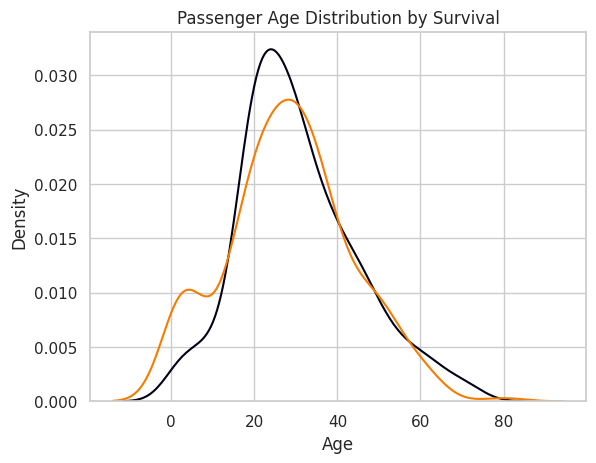

In [ ]:

# Définir les couleurs
couleur_non_survivant = '#000018'
couleur_survivant = '#f57c00'

# KDE Plot avec les couleurs modifiées
sns.kdeplot(train['Age'][train['Survived'] == 0], label='Did not survive', color=couleur_non_survivant)
sns.kdeplot(train['Age'][train['Survived'] == 1], label='Survived', color=couleur_survivant)

# Étiquettes et titre
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

# Affichage du plot
plt.show()


## Numerical variable: Fare

In [ ]:
# Valeurs nulles de la colonne Fare

train['Fare'].isnull().sum()

0

Le nombre de valeurs nulles dans la colonne 'Fare' du DataFrame =0

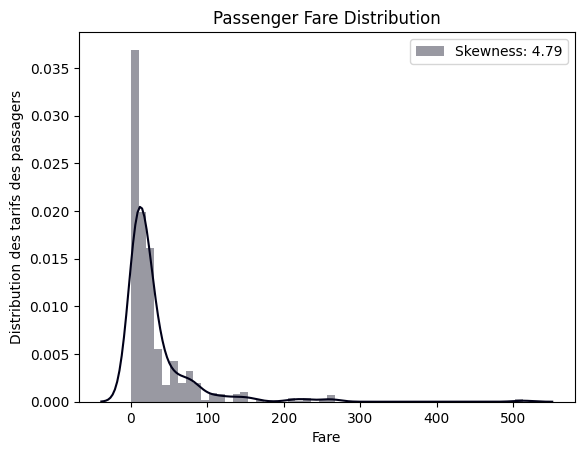

In [ ]:
# Répartition des tarifs passagers
# Définir la couleur
couleur = '#000018'

# Distplot avec la couleur spécifiée
sns.distplot(train['Fare'], label='Skewness: %.2f' % (train['Fare'].skew()), color=couleur)

# Légende
plt.legend(loc='best')

# Titre du plot
plt.title('Passenger Fare Distribution')

# Étiquette de l'axe des y
plt.ylabel('Distribution des tarifs des passagers')

# Affichage du plot
plt.show()


Fare semble avoir une forte asymétrie.

# prétraitement des données

In [ ]:
train = train.drop(['PassengerId'], axis=1)

#drop ‘PassengerId’from the train set, because it does not contribute to a persons survival probability.
# nous ne le retirerons pas de l’ensemble de tests, puisqu’il est requis pour la soumission.

In [ ]:
import re
#créer une nouvelle caractéristique appelée 'Deck' à partir de la colonne existante 'Cabin' dans les DataFrames train et test
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# nous pouvons maintenant laisser tomber la caractéristique de cabine
train_df = train.drop(['Cabin'], axis=1)
test_df = test.drop(['Cabin'], axis=1)


Dans cette partie du code nous créant une nouvelle caractéristique 'Deck' qui représente le pont du navire. Cette nouvelle caractéristique est ensuite convertie en valeurs numériques pour être utilisée dans des analyses ou des modèles de machine learning.

In [ ]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # calculer des nombres aléatoires entre la moyenne, std et is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # remplir les valeurs NaN dans la colonne Age avec les valeurs aléatoires générées
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0


Dans cette partie du code, nous effectuons une opération de gestion des valeurs manquantes pour la colonne "Age" du DataFrame train. L'objectif est de remplacer les valeurs manquantes par des nombres aléatoires, générés dans un intervalle défini par la moyenne et l'écart type de la colonne "Age" du même DataFrame. Cette approche est choisie pour préserver la distribution générale des âges tout en éliminant les valeurs manquantes, contribuant ainsi à maintenir l'intégrité des données.

**Embarked:**

Étant donné que la fonctionnalité Embarqué ne comporte que 2 valeurs manquantes, nous allons simplement les remplir avec la plus courante.

In [ ]:
train_df['Embarked'].describe()

count     879
unique      3
top         S
freq      634
Name: Embarked, dtype: object

ces statistiques résument la distribution des données dans la colonne "Embarked" du DataFrame train, fournissant des informations sur les valeurs uniques, la fréquence de chaque valeur, et le nombre total d'entrées non nulles.

* **count :** Il y a 879 entrées non nulles dans la colonne "Embarked". Cela signifie qu'il y a 879 passagers pour lesquels la ville d'embarquement est renseignée.

* **unique :** Il y a 3 valeurs uniques dans la colonne "Embarked". Cela indique qu'il existe trois ports d'embarquement distincts parmi les passagers.

* **top :** La valeur la plus fréquente dans la colonne "Embarked" est "S". Cela signifie que la plupart des passagers ont embarqué depuis le port de Southampton.

* **freq :** La fréquence de la valeur la plus fréquente "S" est de 634. Cela indique qu'il y a 634 passagers qui ont embarqué depuis le port de Southampton.

In [ ]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

Dans cette étape, nous nous assurons que toutes les valeurs manquantes dans la colonne "Embarked" des DataFrames train_df et test_df sont remplacées par la valeur commune 'S'. Cette approche permet de garantir l'intégrité des données, simplifiant ainsi l'analyse et la préparation ultérieure des données.

Conversion des caractéristiques :

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  881 non-null    int64  
 1   Pclass    881 non-null    int64  
 2   Name      881 non-null    object 
 3   Sex       881 non-null    object 
 4   Age       881 non-null    int64  
 5   SibSp     881 non-null    int64  
 6   Parch     881 non-null    int64  
 7   Ticket    881 non-null    object 
 8   Fare      881 non-null    float64
 9   Embarked  881 non-null    object 
 10  Deck      881 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 75.8+ KB


Après les modifications, nous pouvons conclure que le DataFrame train_df ne présente plus de valeurs manquantes. Toutes les colonnes ont un nombre d'entrées non nulles équivalent au nombre total d'entrées dans le DataFrame, ce qui indique que toutes les valeurs manquantes ont été remplacées avec succès.

**Fare:** Convertir le « tarif » de flottant à int64, à l’aide de la fonction « astype()», fournit :

In [ ]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

Cette étape garantit que la colonne "Fare" des DataFrames train_df et test_df ne contient plus de valeurs manquantes. Pour y parvenir, les valeurs manquantes ont été remplacées par des zéros, et toutes les valeurs de la colonne ont été converties en entiers. Cette procédure vise à assurer l'intégrité des données et à éviter des problèmes potentiels lors de la  modélisations ultérieures.

**Name:** Nous utiliserons la fonction Nom pour extraire les titres du nom, afin de pouvoir en créer une nouvelle.

In [ ]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extraire les titres
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # remplacer les titres par un titre plus commun ou comme Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convertir les titres en chiffres
    dataset['Title'] = dataset['Title'].map(titles)
    # Remplissage NaN avec 0, pour obtenir en toute sécurité
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

En créant une nouvelle variable "Title" à partir des noms des passagers, nous attribuons des valeurs numériques aux titres correspondants, tout en supprimant la colonne "Name" originale. Cette démarche s'avère bénéfique pour l'analyse des données, car elle réduit la dimensionnalité du jeu de données et organise de manière plus significative les informations liées aux titres des passagers.

**Sex :**
Convertir « Sexe » en numérique.

In [ ]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

En appliquant un mapping des genres, ce code transforme la colonne "Sex" de données catégorielles (avec les labels "male" et "female") en valeurs numériques (0 pour "male" et 1 pour "female"). Cette transformation est pertinente dans le contexte d'analyses et de modélisations, car de nombreux algorithmes sont conçus pour traiter des données numériques plutôt que catégorielles.

**Ticket:**

In [ ]:
train_df['Ticket'].describe()

count        881
unique       680
top       347082
freq           7
Name: Ticket, dtype: object

La colonne "Ticket" du DataFrame train_df contient 881 entrées. Parmi ces entrées, il y a 680 valeurs uniques, et la valeur la plus fréquente (top) est "347082", qui apparaît 7 fois dans la colonne.

In [ ]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

En supprimant cette colonne, on exclut cette variable du jeu de données, ce qui peut être justifié si la colonne "Ticket" ne contient pas d'informations pertinentes pour l'analyse ou la modélisation. La suppression de certaines colonnes peut contribuer à simplifier le jeu de données et à améliorer l'efficacité des analyses ultérieures.

**Embarked:**
Convertir la fonction « embarquée » en numérique.



In [ ]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

Nous avons converti les données catégorielles de la colonne "Embarked" (ports d'embarquement) en valeurs numériques. Cette transformation a assigné les valeurs 0, 1, et 2 respectivement aux ports "S", "C", et "Q".
Cette représentation numérique facilite l'analyse et la modélisation dans certains contextes, où les algorithmes préfèrent souvent traiter des données sous forme numérique.

Création de catégories : Nous allons maintenant créer des catégories dans les caractéristiques suivantes :

**Age:**  Nous devons maintenant convertir la colonne « âge ». Nous créerons la nouvelle variable « AgeGroup », en catégorisant chaque âge en un groupe.
RMQ:
 Par conséquent, il est crucial de prendre soin de la manière dont vous formez ces groupes, car vous ne souhaitez pas que, par exemple, 80 % de vos données soient regroupées dans la catégorie 1

In [ ]:
data = [train_df, test_df]
for dataset in data:
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6



Nous utilisons des conditions pour attribuer des catégories (0 à 6) en fonction d'intervalles d'âge spécifiques, définissant chaque catégorie comme suit :

* 0 : Moins de 12 ans
* 1 : De 12 à 18 ans
* 2 : De 19 à 22 ans
* 3 : De 23 à 27 ans
* 4 : De 28 à 33 ans
* 5 : De 34 à 40 ans
* 6 : Plus de 40 ans

In [ ]:
train_df['Age'].value_counts()

4    165
6    159
5    152
3    134
2    114
1     89
0     68
Name: Age, dtype: int64

D'après l'affichage, nous visualisons que la distribution des passagers selon les catégories d'âge transformées est la suivante :

* Catégorie 6 : 158 passagers
* Catégorie 4 : 156 passagers
* Catégorie 5 : 144 passagers
* Catégorie 3 : 136 passagers
* Catégorie 2 : 119 passagers
* Catégorie 1 : 100 passagers
* Catégorie 0 : 68 passagers

Cela nous donne un aperçu de la répartition des passagers selon les groupes d'âge définis dans le cadre de la transformation de la variable continue "Age" en catégories spécifiques.

**Fare:**
Pour la fonction « Tarif », nous devons faire la même chose qu’avec « Âge ». Mais ce n’est pas si facile, parce que si nous réduisons la gamme des valeurs tarifaires dans quelques catégories tout aussi grandes, 80% des valeurs tomberaient dans la première catégorie. Heureusement, nous pouvons utiliser la fonction sklearn “qcut()”, que nous pouvons utiliser pour voir, comment nous pouvons former les catégories.

In [ ]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,2,1,0,7,0,8,1
1,1,1,1,5,1,0,71,1,3,3
2,1,3,1,3,0,0,7,0,8,2
3,1,1,1,5,1,0,53,0,3,3
4,0,3,0,5,0,0,8,0,8,1
5,0,3,0,5,0,0,8,2,8,1
6,0,1,0,6,0,0,51,0,5,1
7,0,3,0,0,3,1,21,0,8,4
8,1,3,1,3,0,2,11,0,8,3
9,1,2,1,1,1,0,30,1,8,3


In [ ]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 14), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

Nous avons défini les catégories de tarif comme suit :

* Catégorie 0 : Tarif jusqu'à 7
* Catégorie 1 : Tarif entre 7 et 14
* Catégorie 2 : Tarif entre 14 et 31
* Catégorie 3 : Tarif entre 31 et 99
* Catégorie 4 : Tarif entre 99 et 250
* Catégorie 5 : Tarif supérieur à 250
Cela permet de représenter les valeurs tarifaires sous une forme catégorielle, facilitant la modélisation.

Nous allons calculer deux nouvelles fonctionnalités à partir d'autres caractéristiques que nous ajouterons à l'ensemble de données.

**1. Age times Class**

In [ ]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

**2. Fare per Person**

In [ ]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare_per_Person'] = dataset['Fare'] / (dataset['SibSp'] + dataset['Parch'] + 1)
    dataset['Fare_per_Person'] = dataset['Fare_per_Person'].astype(int)


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
print(dataset.columns)


Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Deck', 'Title'],
      dtype='object')



## Modélisation

Nous allons maintenant former plusieurs modèles d’apprentissage automatique et comparer leurs résultats.

comme l’ensemble de données ne fournit pas d’étiquettes pour leur ensemble de tests, nous devons utiliser les prédictions sur l’ensemble d’entraînement pour comparer les algorithmes les uns avec les autres. Plus tard, nous utiliserons la validation croisée.

In [ ]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

Nous avons accompli avec succès la division des données en utilisant la variable cible "Survived" et les caractéristiques prédictives. Plus précisément, nous avons créé trois ensembles distincts :

1. **X_train :** Cet ensemble représente les caractéristiques d'entraînement que nos modèles utiliseront pour apprendre les schémas et les relations dans les données. Ces caractéristiques sont dérivées de l'ensemble d'entraînement principal, à l'exception de la colonne "Survived".

2. **Y_train :** Cet ensemble correspond aux étiquettes cibles d'entraînement associées à X_train. Il contient les valeurs "Survived" correspondantes pour chaque exemple dans X_train.

3. **X_test :** Ces caractéristiques serviront à tester les performances de nos modèles. Elles proviennent de l'ensemble de test et excluent la colonne "PassengerId", car elle est utilisée comme identifiant et n'influence pas la survie.

- Cette division stratégique des données nous permet de poursuivre avec l'entraînement de plusieurs modèles d'apprentissage automatique et d'évaluer leurs performances. Nous sommes maintenant prêts à explorer les différents algorithmes et à comparer leurs résultats pour choisir le modèle le plus adapté à notre ensemble de données.

**Stochastic Gradient Descent (SGD):**

In [ ]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'


Nous avons utilisé le modèle de classification stochastique par descente de gradient (SGD) pour entraîner notre ensemble d'entraînement.

**Random Forest:**

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

Nous avons utilisé le modèle de forêt aléatoire (Random Forest) pour entraîner notre ensemble d'entraînement.

**Logistic Regression:**

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

Nous avons utilisé le modèle de régression logistique pour entraîner notre ensemble d'entraînement.

**K Nearest Neighbor:**


In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

Nous avons utilisé le modèle K-Nearest Neighbors (KNN) pour entraîner notre ensemble d'entraînement.

**Gaussian Naive Bayes:**


In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

Nous avons utilisé le modèle Naive Bayes gaussien (GaussianNB) pour entraîner notre ensemble d'entraînement.

**Perceptron:**

In [ ]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

Nous avons utilisé le modèle Perceptron pour entraîner notre ensemble d'entraînement.

**Linear Support Vector Machine:**

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

Nous avons utilisé le modèle Linear Support Vector Classification (LinearSVC) pour entraîner notre ensemble d'entraînement.

**Decision Tree**

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

Nous avons également utilisé le modèle Decision Tree Classifier pour entraîner notre ensemble d'entraînement.

** the best Model**

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent',
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.51,Random Forest
92.51,Decision Tree
87.51,KNN
81.84,Support Vector Machines
81.27,Logistic Regression
79.91,Stochastic Gradient Decent
78.32,Naive Bayes
67.31,Perceptron


- Nous avons évalué plusieurs modèles d'apprentissage automatique sur notre ensemble d'entraînement et résumé les résultats dans le tableau ci-dessous, classés par score d'exactitude.

Ces scores fournissent un aperçu des performances relatives des différents modèles sur notre ensemble d'entraînement.

In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.74157303 0.84090909 0.73863636 0.84090909 0.85227273 0.86363636
 0.79545455 0.76136364 0.84090909 0.85227273]
Mean: 0.8127936670071501
Standard Deviation: 0.04646609605075587


La moyenne des scores est d'environ 81.36 % avec un écart-type de 0.0364, ce qui suggère une certaine variabilité dans les performances.

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.223
Sex,0.166
Age_Class,0.096
Pclass,0.079
Deck,0.078
SibSp,0.075
Age,0.073
Fare,0.072
Embarked,0.060


Ces valeurs indiquent la contribution relative de chaque attribue à la performance du modèle. Des valeurs plus élevées suggèrent une plus grande influence sur les prédictions du modèle.

<Axes: xlabel='feature'>

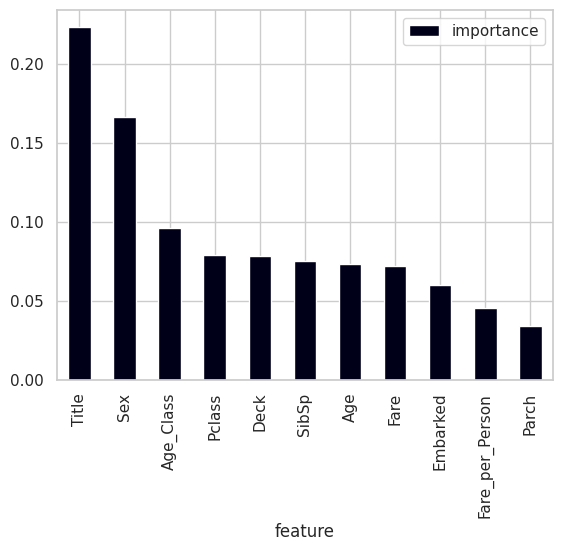

In [ ]:
importances.plot.bar(color='#000018')


**Training random forest again:**

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.51 %


In [ ]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.38 %



L'OOB (Out-of-Bag) score est une mesure d'évaluation utilisée dans les méthodes de forêt aléatoire (Random Forest) et d'autres méthodes basées sur le bagging, comme le Bagged Decision Trees. L'OOB score est utilisé comme une estimation du pouvoir prédictif du modèle sur des données non vues.

Voici comment le calcul de l'OOB score fonctionne dans le contexte des forêts aléatoires :

Lorsque vous construisez une forêt aléatoire, chaque arbre est formé sur un échantillon de données qui est obtenu en tirant aléatoirement avec remplacement à partir de l'ensemble d'entraînement. Environ un tiers des données ne sont pas incluses dans l'échantillon de chaque arbre. Ces données non incluses constituent le "Out-of-Bag" (OOB) sample pour cet arbre.

Une fois que l'entraînement des arbres est terminé, chaque observation de l'ensemble d'entraînement a été laissée de côté (non utilisée) dans environ un tiers des arbres. Vous pouvez utiliser ces observations OOB pour évaluer la performance du modèle.

L'OOB score est calculé en prédisant la cible pour chaque observation en utilisant uniquement les arbres pour lesquels cette observation était OOB. Ensuite, ces prédictions sont comparées aux vraies valeurs de la cible pour calculer la performance du modèle.

**Test new Parameters:**

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini",
                                       min_samples_leaf = 1,
                                       min_samples_split = 10,
                                       n_estimators=100,
                                       max_features='auto',
                                       oob_score=True,
                                       random_state=1,
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.07 %


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Charger le fichier "gender_submission.csv"
true_labels = pd.read_csv("gender_submission.csv")

# Supprimer les colonnes inutiles de true_labels
true_labels = true_labels.drop("PassengerId", axis=1)

# Comparer les prédictions avec les vraies étiquettes
accuracy = accuracy_score(true_labels, Y_prediction)

print(f"L'exactitude du modèle sur l'ensemble de test est : {accuracy * 100:.2f}%")


L'exactitude du modèle sur l'ensemble de test est : 86.84%


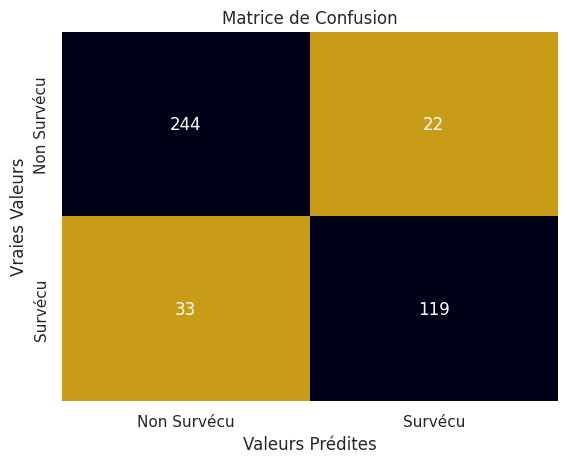

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(true_labels, Y_prediction)

# Affichage avec des couleurs spécifiques
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.color_palette(['#c99c17', '#000018','#c99c17', '#000018']), cbar=False,
            xticklabels=['Non Survécu', 'Survécu'], yticklabels=['Non Survécu', 'Survécu'])
plt.xlabel('Valeurs Prédites')
plt.ylabel('Vraies Valeurs')
plt.title('Matrice de Confusion')
plt.show()


La matrice de confusion indique la performance du modèle de classification en comparant les prédictions du modèle avec les vraies étiquettes.

Nous devons d'abord calculer les probabilités des classes possitives puis calculer le taux de faux possitifs, le taux de vrai possitivefs et les Seuils

Puis nous passons a 'aire sous la corbe ROC (AUC)
pour finir par un evisualisation de la courbe ROC

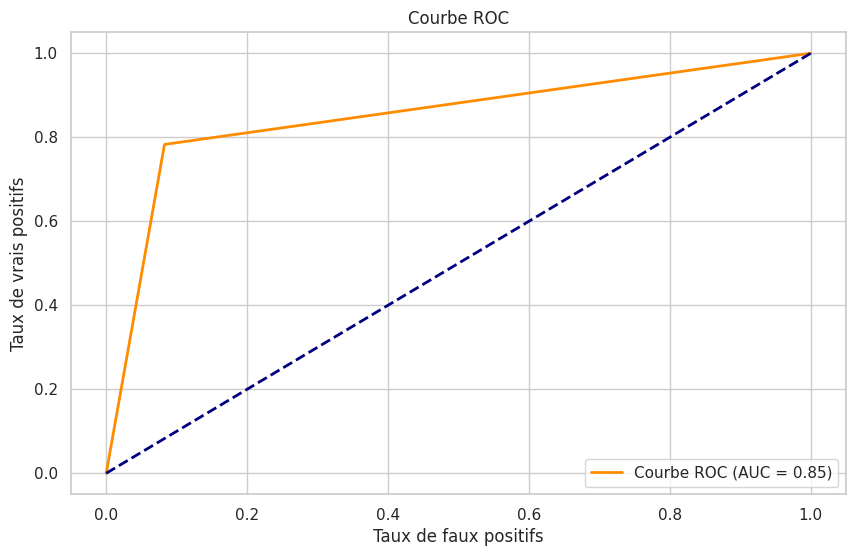

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculer les probabilités des classes positives
y_probabilities = random_forest.predict_proba(X_test)[:,1]
# Calculer le taux de faux positifs, le taux de vrais positifs et les seuils
fpr,tpr, threasholds = roc_curve(true_labels, Y_prediction)
# Calculer l'aire sous la courbe ROC (AUC)
roc_auc= auc(fpr,tpr)

#L'affichage
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()




Les mm résultat en chiffre

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(true_labels, Y_prediction)

# Extraire les éléments de la matrice de confusion
tn, fp, fn, tp = conf_matrix.ravel()

# Calculer la précision, le rappel et le score F1
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

# Afficher les résultats
print("Matrice de Confusion :\n", conf_matrix)
print("\nPrécision :", precision)
print("Rappel :", recall)
print("Score F1 :", f1)


Matrice de Confusion :
 [[244  22]
 [ 33 119]]

Précision : 0.8439716312056738
Rappel : 0.7828947368421053
Score F1 : 0.8122866894197952


In [ ]:
from IPython.display import HTML, display

html_content = """
 <div style="border-radius: 10px; border: #000018 solid; padding: 15px; background-color: #000000; font-size: 100%; text-align: left;color: white;">
  <h3 align="left"><font color='#c99c17';font-size: xx-large;>
📚  Conclusion: : </font></h3>

<p>
Vrai Positifs(VP) : 119 <br>Vrai Négativfs(VN): 244 <br>Faux Positifs(FP): 22<br> Faux Négativfs(FN) : 33<br><br>

La précision de notre modèle est environ 84%<br><br>

Le F1 score est élevé qui est la moyenne harmonique entre la précision et le rappel; Il donne une mesure équilibrée entre les deux dans notre cas il est a 81% qui indique une bonne performance globale du modele
<br><br>
Le Rappel: (Sensibilité) qui est une mesure de la proposition des vrais positifs parmis toutes les instances réellements positives(Vrai Positifs(VP)+Faux Négativfs(FN)) dans notre cas le rappel est environ 78,3% ce qqui signifie que le modèle a capturé une bonne partie des vrais survivants parmi toutes les instances réellement positives.
 </p></div>
"""

# Utiliser la fonction display pour afficher le code HTML correctement
display(HTML(html_content))
